In [1]:
from utils_task3 import *
from visual_task3 import *

%reload_ext autoreload
%autoreload 2

## Part 1: Linear operator A
#### load the dataset

In [2]:
x0, x1 = load_dataset_task3()

#### Calculate the approximate vector field with given formular, with $\Delta$t = 0.01

In [3]:
dt = 0.01
v = get_finite_difference(x0,x1,dt)

#### calculate the linear matrix A with least square minimun

In [4]:
A_hat = lstsq(x0, v, rcond=None)
A_hat[0]

array([[-1.0016012 ,  0.08672716],
       [-0.02534942, -4.32671381]])

#### Visualize the approximate result for $\Delta$t = 0.01

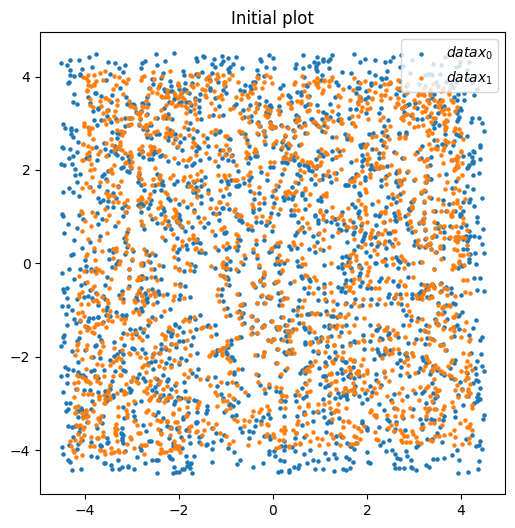

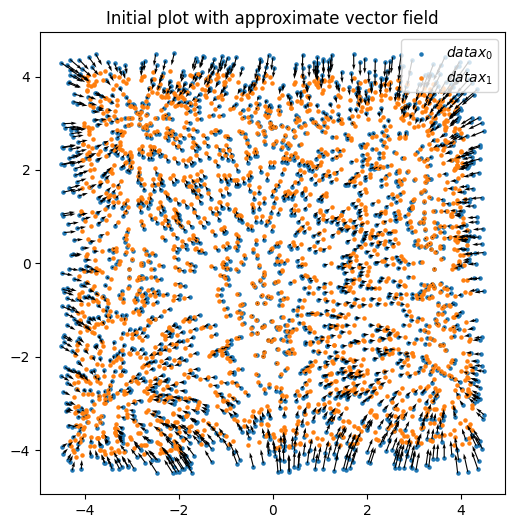

In [5]:
vis_nonlinear_vectorfield_data(x0, x1, v)

In [6]:
x1_hat = get_estimated_x1(x0 = x0, x1=x1, dt=dt)  # N x 2 x t_series

In [7]:
mse = get_mean_square_error(x1, x1_hat, dt)


 if ∆t = 0.01, the mean square error of all individual points is 0.018637908030517448



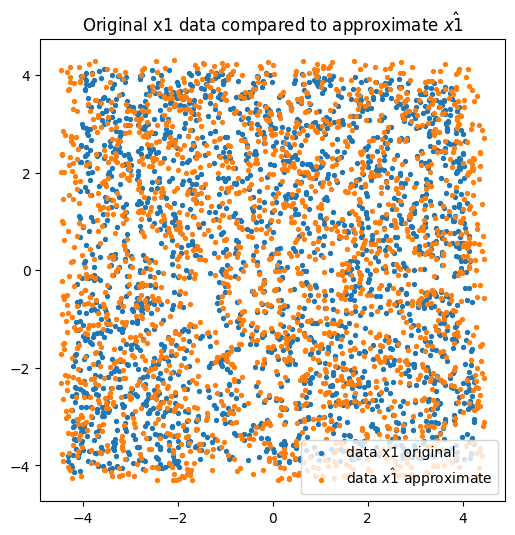

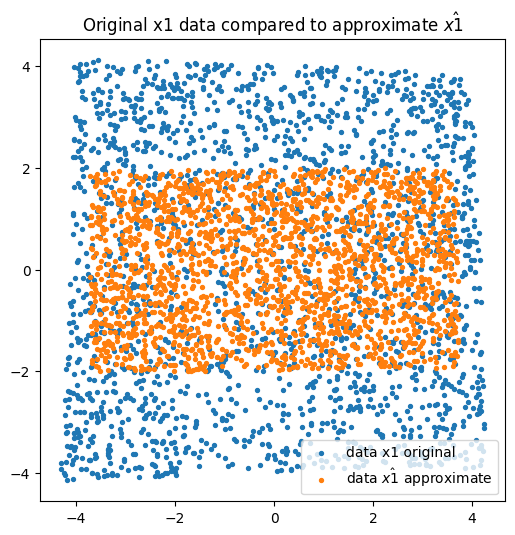

In [8]:
vis_approximate_x1_extend(x1, x1_hat)

#### The phase portrait for the linear approximation, with  $\Delta$t = 0.01

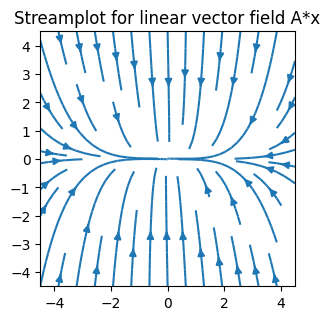

In [9]:
plot_phase_portrait(A_hat[0])

## Part 2: Radial basis function
#### Load the 2 datasets again

In [10]:
x0, x1 = load_dataset_task3()
dt = 0.01

In [11]:
x1_hat,C_hat_T, xl = get_estimated_x1_rbf(x0, x1, dt, epsilon = 0.1, num_center =300)

In [12]:
mse = get_mean_square_error(x1, x1_hat, dt)

In [13]:
mse[-1]

0.01908709366941228

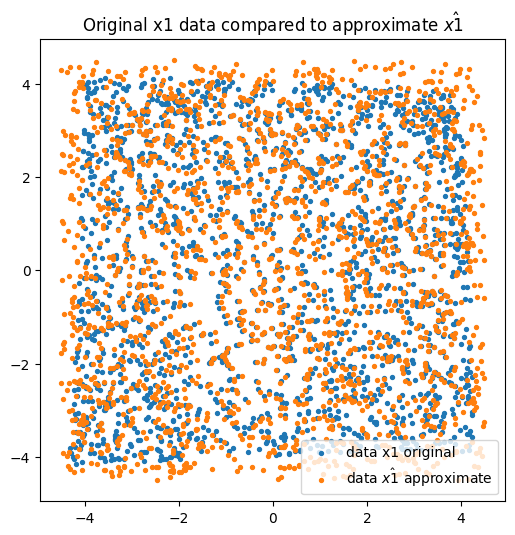

In [14]:
vis_approximate_x1(x1, x1_hat)

### To find the optimal $\epsilon$ and L the number of basis function centers 
#### 2 for loops and using grid search

In [15]:
epsilon_list = [0.01, 0.1, 0.5, 1, 5, 10, 20] #np.linspace(3,8,6).astype(int)
num_center_list = np.linspace(100,1000,40).astype(int)

In [16]:
x1_hat_best, C_hat_T_best, xl_best, epsilon_best, num_center_best, epsilon_worst, num_worst = find_best_conf(epsilon_list, num_center_list,dt = 0.01)


The best configuration parameters are epsiplon_best:1, num_center_best:169. 
           and the mse is 0.00040303885400858313 
         The worst configuration parameters are epsiplon_worst:0.01, num_center_worst:100. 
           and the mse is 0.02501235923946678 


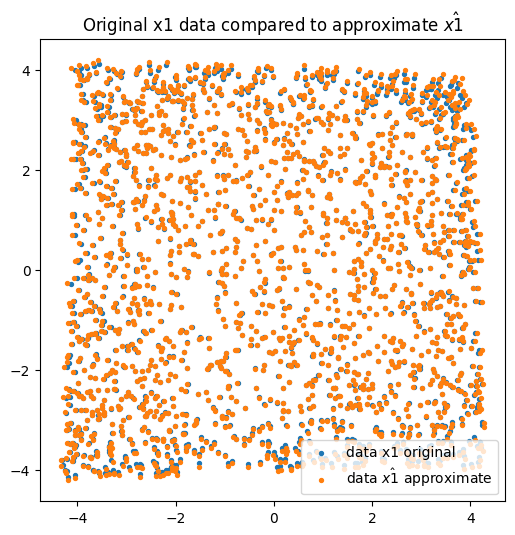

In [17]:
vis_approximate_x1(x1, x1_hat_best)

#### draw the phase portrait of optimal $\epsilon$ and L the number of basis function centers 

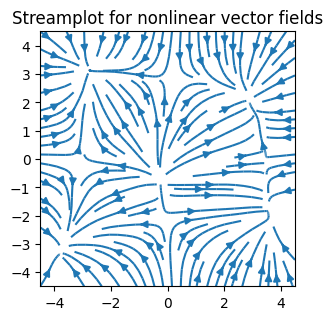

In [18]:
plot_phase_portrait_rbf(C_hat_T = C_hat_T_best, xl = xl_best, epsilon = epsilon_best)

## Part 3: Try to find the steady state given the optimal $\epsilon$ and L (number of rbf centers)

In [19]:
x1_steady = find_steady_states(x0, x1, C_hat_T = C_hat_T_best, xl = xl_best, epsilon = epsilon_best)

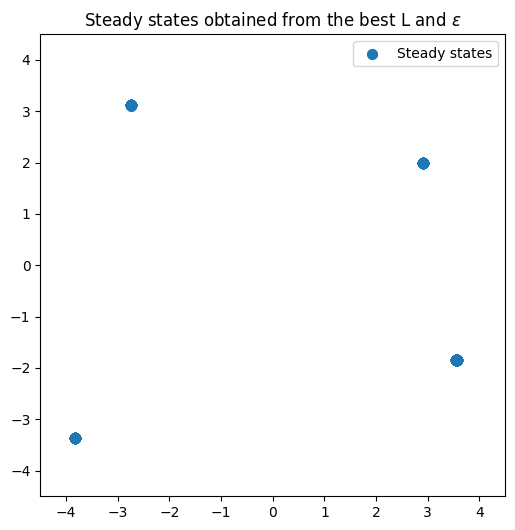

In [20]:
vis_steady_states(x1_steady[:,:,-1])